# Lab 5 - Visual Analytics in Python
*© 2023 Colin Conrad*

Python comes with a few good visualization tools, though (as we will see) they are not a replacement for a good data visualization tool such as Tableau.

**This week, we will achieve the following objectives:**
- Visualize a dataframe in Python
- Visualize a grouped dataframe
- Change your plot styles
- Conduct inferential analysis with a t-test

# Case: Apple Appstore
Pretty much everyone knows about the Apple iPhone; after all, this was *the* defining smartphone. However, iPhone's reign as the big boss of smartphones may be coming to an end. According to Gartner, as Q3 2019 [iPhone has seen its year-over-year sales decline by 10\%](https://www.gartner.com/en/newsroom/press-releases/2019-11-26-gartner-says-global-smartphone-demand-was-weak-in-thi). This is due to increasing competition from some of its android competitors.

Part of Apple's key to success has been the iPhone App Store. Unlike its Android counterparts, all Apple apps are developed by licensed developers and carefully screened for malware. To analyze other factors in its success, we can observe data from the Appstore itself. Using this dataset provided by [Ramanathan on Kaggle](https://www.kaggle.com/ramamet4/app-store-apple-data-set-10k-apps) we can visualize features of the dataset which might have contributed to the success of the appstore.

# Objective 1: Visualize a dataframe in Python
The first thing we will do is create some basic visualizations. Pandas has some [great documentation on visualization](https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html#basic-plotting-plot) which I strongly encourage you to read. This documentation provides more details than I can give in this exercise, though I will make an effort to highlight some key points.

Let's start by importing the Pandas dataframe, as before. Rather than importing `numpy`, we will import a different library called `matplotlib`. This tool is a plotting library which is designed to integrate with pandas. As before, we will import a csv file, this time from Apple.

In [1]:
import pandas as pd # import pandas 

import matplotlib.pyplot as plt

apps = pd.read_csv('Lab5_data_apple.csv') # command pandas to import the data

### Dataframe head (again!)
I recommend always starting by understanding the data. In this case, we have a series of iPhone apps with a few interesting fields. Here are some details on ones which are potentially interesting and non-obvious to me:
- **rating_count_tot**: Total number of ratings for all versions of the app
- **rating_count_ver**: Number of ratings for this version of the app
- **sup_devisces.num**: Number of Apple devices that the app supports
- **lang.num**: The number of (human) languages which the app supports

In [2]:
apps.head()

,Unnamed: 0,id,track_name,size_bytes,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic
0,1,281656475,PAC-MAN Premium,100788224,USD,3.99,21292,26,4.0,4.5,6.3.5,4+,Games,38,5,10,1
1,2,281796108,Evernote - stay organized,158578688,USD,0.00,161065,26,4.0,3.5,8.2.2,4+,Productivity,37,5,23,1
2,3,281940292,"WeatherBug - Local Weather, Radar, Maps, Alerts",100524032,USD,0.00,188583,2822,3.5,4.5,5.0.0,4+,Weather,37,5,3,1
3,4,282614216,"eBay: Best App to Buy, Sell, Save! Online Shop...",128512000,USD,0.00,262241,649,4.0,4.5,5.10.0,12+,Shopping,37,5,9,1
4,5,282935706,Bible,92774400,USD,0.00,985920,5320,4.5,5.0,7.5.1,4+,Reference,37,5,45,1


In [3]:
len(apps)

7197

### Visualizing with pandas.plot()
Pandas really is designed for data scientists. In addition to the dataframe features which we observed last week, pandas also comes pre-built with plotting features. Pandas also provides some [excellent documentation on plotting](https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html#basic-plotting-plot) which I encourage you to read.

Let's start by trying to plot our dataframe. Surprisingly, pandas is smart enough to allow us to do this, though it is certainly not pretty! We will need to be a bit more specific about what we want to visualize before proceeding.

<AxesSubplot:>

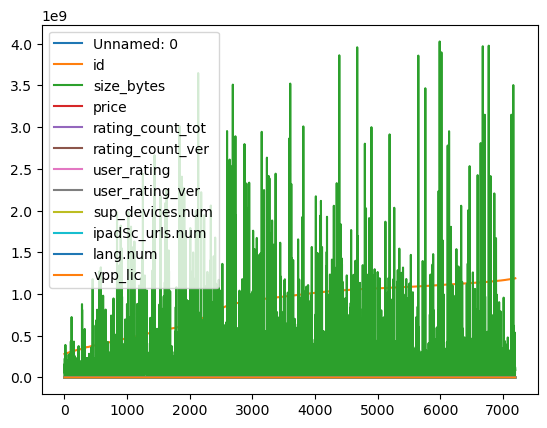

In [4]:
apps.plot() # plots the dataframe

The graph above is meaningless. Let's try to focus on more specific elements of this dataframe.

### Plot a series
The first way that we might make sense of the data is by visualizing series from the data. However, simply using `.plot()` with a series suffers from serious problems. Try executing the visualization below, which attempts to visualize the user ratings for the current version of each app. **This is is not yet intelligible.**

<AxesSubplot:>

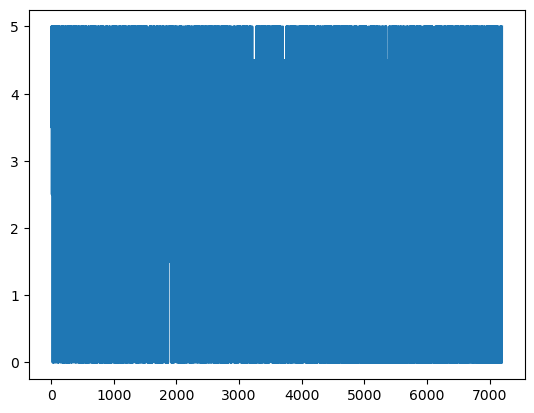

In [5]:
apps['user_rating_ver'].plot() # visualize user ratings for the current version of the app

Though pandas is smart, it is not **that** smart. When we naively try to visualize the version, we end up with unreadable garbage. Fortunately, we can alter our series to suit our needs. Consider visualizing the sorted user ratings. Note that we have to explicitly tell pandas to not order these by the original index values.

<AxesSubplot:>

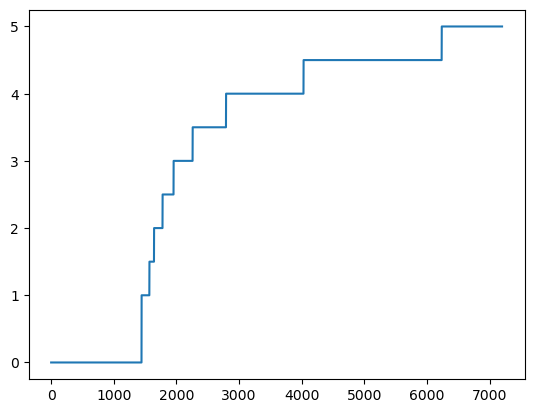

In [6]:
apps['user_rating_ver'].sort_values().plot(use_index=False) # sort the series and then plot it

Much better!
### Specifying axes and figure size
It's important to remember that when making plots we specify an axis. For instance, if we only wanted to show the number of ratings received for an app, we could specify the y axis as `rating_count_tot`. To make our graph more readable, we can also change the figure size by specifying `figsize=(12,6)` -- 12 inches by 6 inches.

<AxesSubplot:>

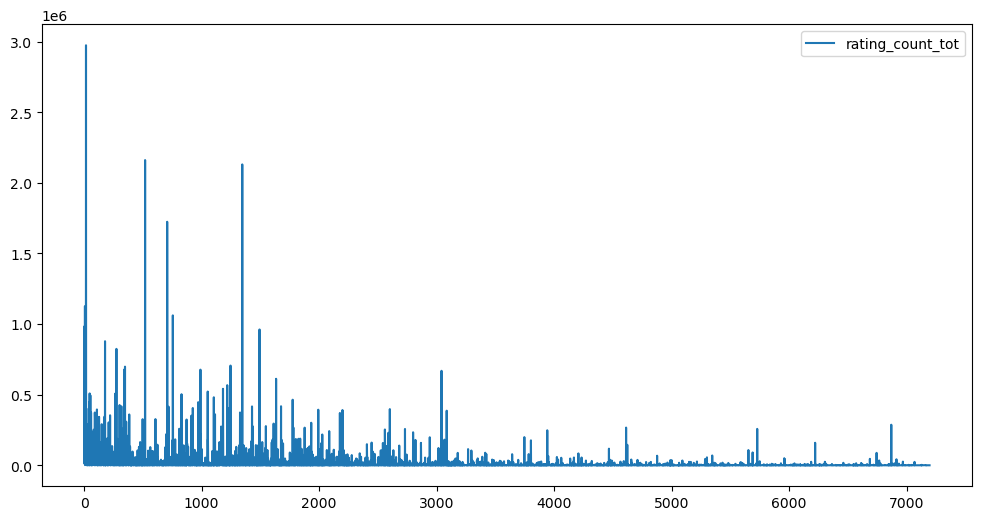

In [7]:
apps.plot(y='rating_count_tot', figsize=(12,6))

If we wished instead to visualize a subset of the data, say only highly rated apps, we could create a subset similarly to Lab 8. We can then use `plot()` to visualize the results. The result will still not be informative, but it is progress.

<AxesSubplot:>

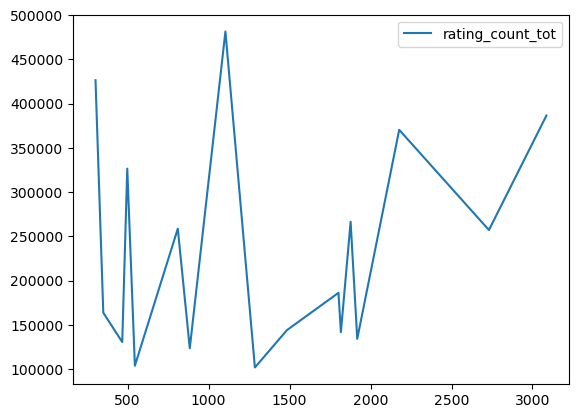

In [8]:
highly_rated = apps[(apps['user_rating'] == 5) &
                    (apps['rating_count_tot'] > 100000)] # a subset of apps with ratings of 5 and at least 100 000 ratings

highly_rated.plot(y='rating_count_tot') # manually specify the y value, in this case rating count

### Try a different plot
Our visualization needs two things in order to be useful. The first is a useful visualization for comparing the different states identified. The second is a decent x label. We can solve these problems by asking pandas to create a bar plot with the `track_name` axis. As you recall, track name is the name of the app. 

**Note:** you will probably get a warning about a missing glyph. This is because of encoding issues with some of the characters.

<AxesSubplot:xlabel='track_name'>

/Users/samibashir/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9412 (\N{CIRCLED LATIN CAPITAL LETTER O}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


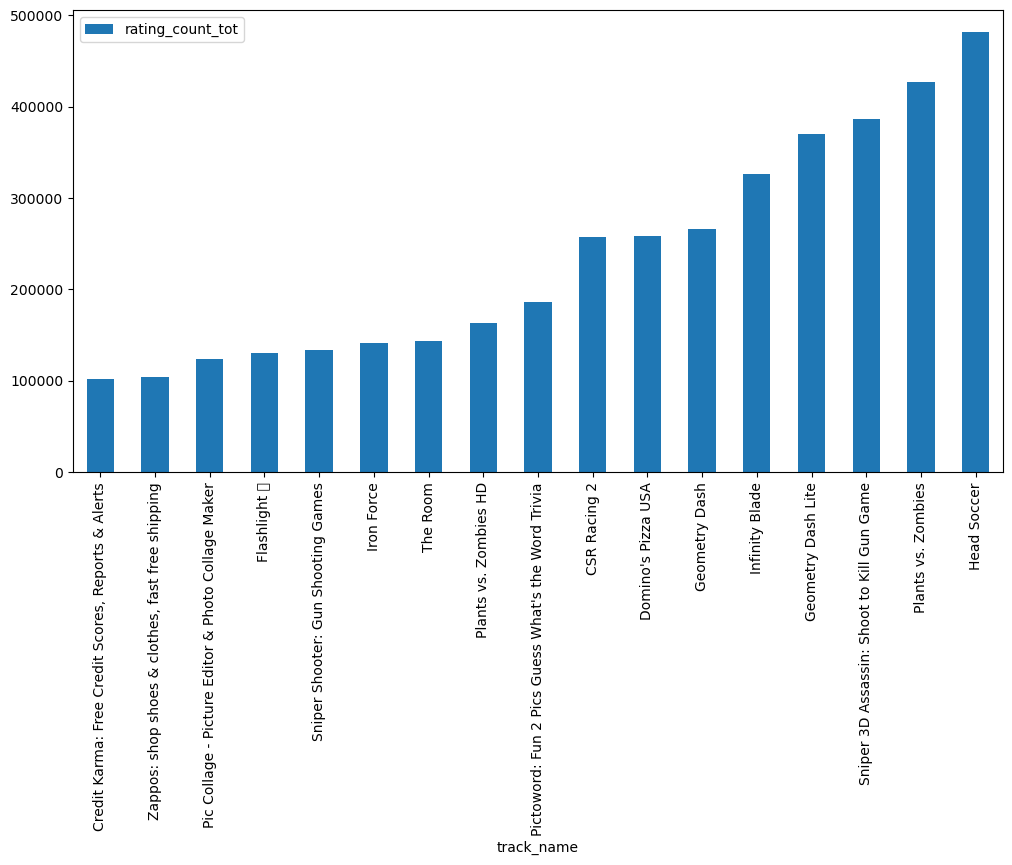

In [9]:
sorted_rated = highly_rated.sort_values(by='rating_count_tot') # sort the data

sorted_rated.plot.bar(x='track_name', y='rating_count_tot', figsize=(12,6)) # specify bar plot with the x value of track name

This is a fine graph of the apps with an average rating of 5 and at large number of ratings! I am sure that many of you use these apps (I counted 3 which I use). 

<h2> Challenge Question 1 </h2>

Genereate a bar graph to visualize the price of the apps(track_name)

<AxesSubplot:xlabel='track_name'>

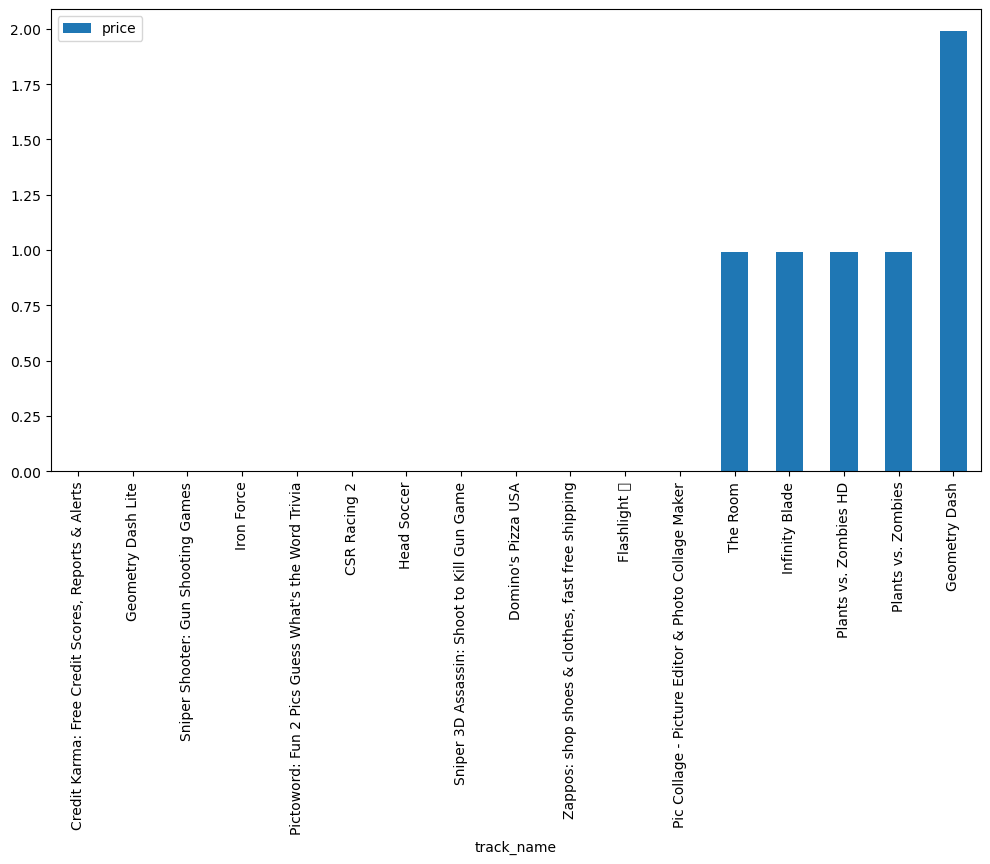

In [10]:
price_rated = highly_rated.sort_values(by='price') # sort the data

price_rated.plot.bar(x='track_name', y='price', figsize=(12,6)) # specify bar plot with the x value of track name#challenge question 1

### Remove outliers
Finally, there are other types of visualizations which could be useful. For instance, a scatter plot can be used to compare the variance between two variables. Let's plot the rating count and price to see whether there is a relationship.

<AxesSubplot:xlabel='price', ylabel='rating_count_tot'>

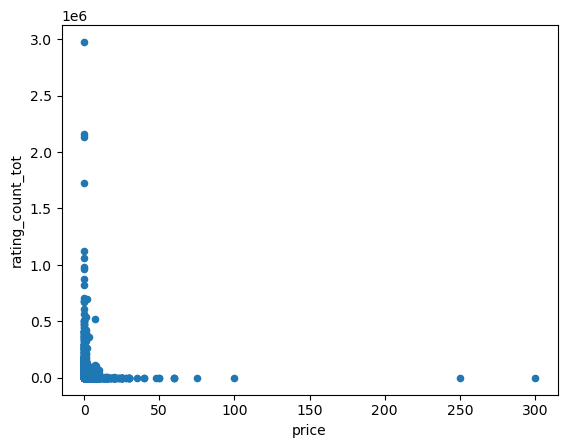

In [11]:
price_rating = apps[['price', 'rating_count_tot', 'rating_count_ver']] # we will include three series in this dataframe

price_rating.plot.scatter(x='price', y='rating_count_tot') # we choose to only visualize two of them

Right away, it is clear that there are some outliers with a small number of ratings and high price, as well as a high number of ratings and low price. We can remove the outliers to try and make sense of this graph. There are many ways to remove outliers, such as by using standard deviation. However, for the purposes of *Introduction to Data Science* it is sufficient to simply remove values that seem too extreme. The code below removes price values which are greater than 50 and rating counts which are greater than 100000. 

<AxesSubplot:xlabel='price', ylabel='rating_count_tot'>

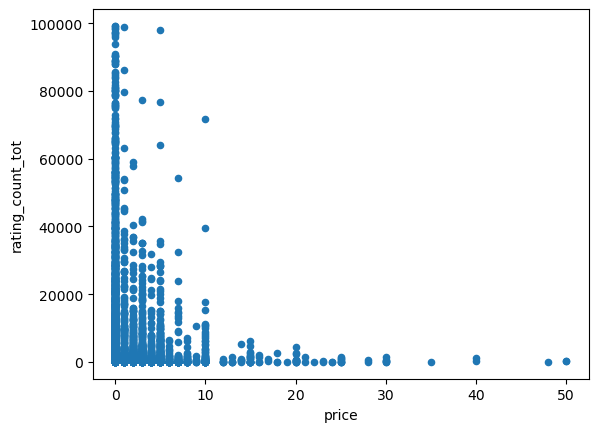

In [12]:
apps_clean = apps[(apps['price'] < 50) &
                  (apps['rating_count_tot'] < 100000) &
                  (apps['rating_count_ver'] < 100000)]

apps_clean.plot.scatter(x='price', y='rating_count_tot')

## Challenge Question 2 (1 point)
Take a subset of the data where `prime_genere` is equal to `Games`. Generate a scatter plot with the number of languages on one axis and the price on the other. Do you think this tells us something about the relationship between these variables? 

<AxesSubplot:xlabel='price', ylabel='lang.num'>

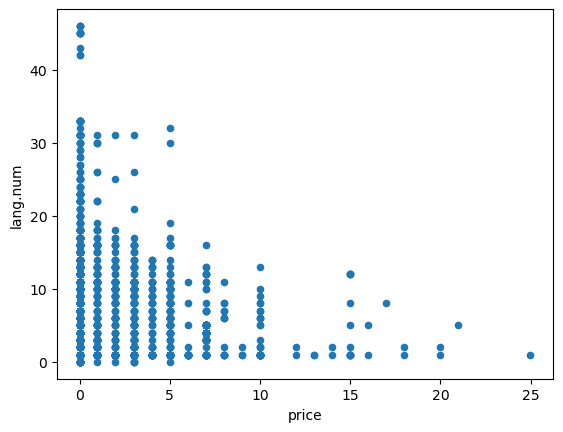

In [13]:
games_clean = apps[(apps['prime_genre'] == 'Games') &
                  (apps['price'] < 25)]

games_clean.plot.scatter(x='price', y='lang.num')

In [14]:
# Does not seem possible to tell whether there is a defined relationship between price and language numbers
# It is noticeable that the games with the highest language numbers tend to fall mostly at 0 price
# There are obviously anomalies between price ranges 10-15 and 15-20 but as the price increases, the number of languages tends to decrease
# The game that costs the most in this dataset is very low in language numbers

# Objective 2: Visualize a grouped dataframe
So far so good. What we have done so far works for continuous variables such as `price`, but not nominal variables such `prime_genre`. For instance, if we simply visualize `prime_genre` on the x axis, we will get a nonsensical graph. 

<AxesSubplot:xlabel='prime_genre'>

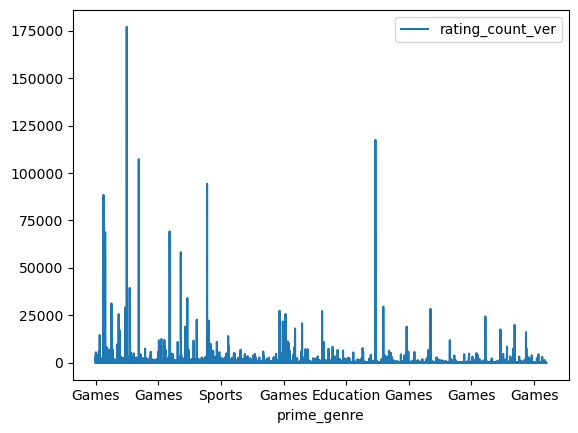

In [15]:
apps.plot(x='prime_genre', y='rating_count_ver')

To effectively analyze discrete variables we need to use a `groupby` query. Pandas [also has great documentation](https://pandas.pydata.org/pandas-docs/stable/user_guide/groupby.html) on this concept so be sure to take a look. Much like with SQL, we can use `groupby` to specify sets of data which we wish to analyze. 

For instance, to analyze the median user rating for each genre, we could create a grouped dataframe by grouping by primary genre. We can then retrieve the median values of each genre easily.

In [16]:
avg = apps.groupby('prime_genre') # group by primary genre

avg['user_rating'].median() # provide the median user rating for each 

prime_genre
Book                 3.50
Business             4.00
Catalogs             1.75
Education            4.00
Entertainment        3.50
Finance              3.00
Food & Drink         4.00
Games                4.50
Health & Fitness     4.50
Lifestyle            3.50
Medical              4.50
Music                4.00
Navigation           3.50
News                 3.50
Photo & Video        4.50
Productivity         4.50
Reference            4.00
Shopping             4.00
Social Networking    3.50
Sports               3.50
Travel               4.00
Utilities            4.00
Weather              4.00
Name: user_rating, dtype: float64

To visualize this on a graph, we could simply create a bar plot. This is a useful visualization for understanding the median user ratings for each genre. Some genres, such as Catalogs, fare poorly.

<AxesSubplot:xlabel='prime_genre'>

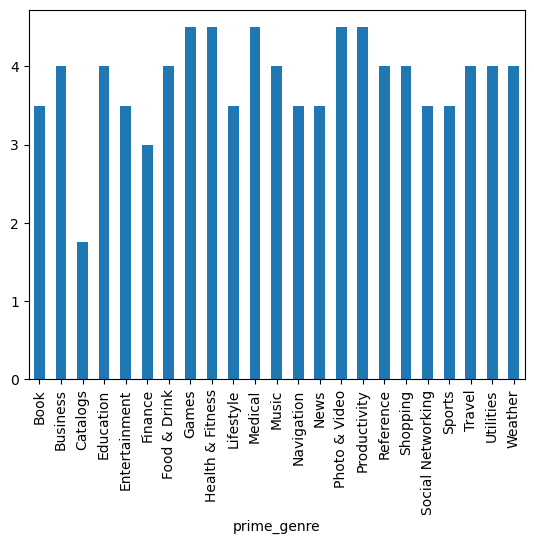

In [17]:
avg['user_rating'].median().plot.bar()

## Challenge Question 3
Create a bar graph which visualizes the mean price for each `content_rating`. Is there a trend? 

<AxesSubplot:xlabel='prime_genre'>

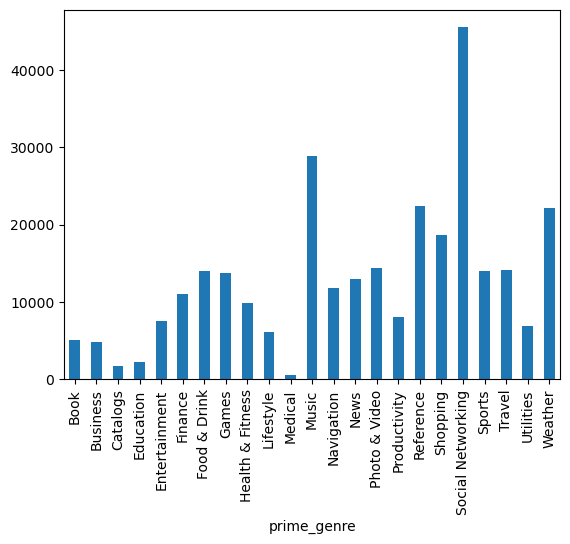

In [18]:
avg['rating_count_tot'].mean().plot.bar() #challenge question 3

In [19]:
# Social Networking Apps seem to get the most rating counts followed by Music. Surpising to see Medical so low.

## Challenge Question 4
Visualize the sum of the total rating count for each genre. Instead of a bar graph, use a pie chart. If you get stuck, consider [reading the docs](https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html#pie-plot) on `plot.pie()`.

<AxesSubplot:ylabel='rating_count_tot'>

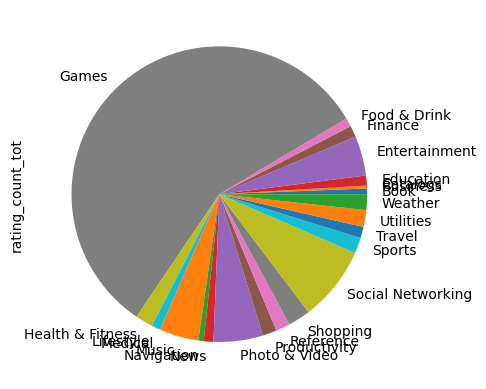

In [20]:
avg['rating_count_tot'].sum().plot.pie()#challenge question 4

# Objective 3: Change your plot styles
So far, we have focused on creating various graphs with the data. In addition to creating graphs, we can also change features of these graphs such as their colors, shapes, textures or legend. For instance, if we revisit our scatter plot, we can change the color by specifying `color='DarkGreen'` as an input to the method.

<AxesSubplot:xlabel='price', ylabel='rating_count_tot'>

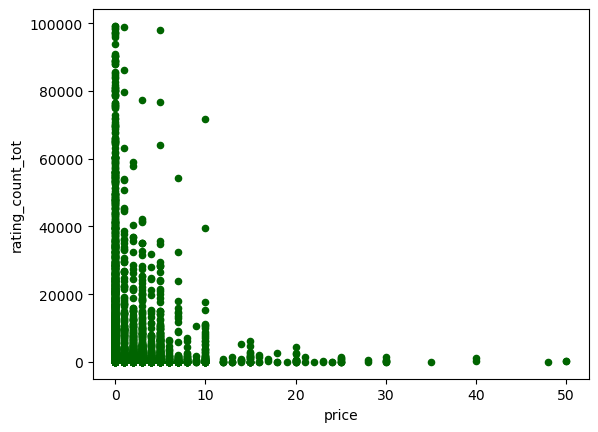

In [21]:
apps_clean.plot.scatter(x='price', y='rating_count_tot', color='DarkGreen')

You can also specify colors which change with the data variables. The visualization below changes color based on the `user_rating`.

<AxesSubplot:xlabel='price', ylabel='rating_count_tot'>

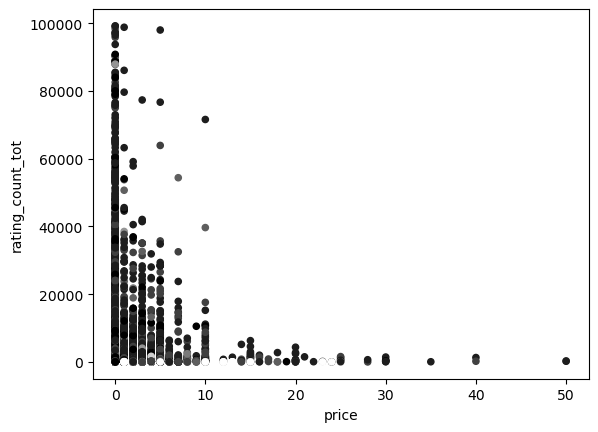

In [22]:
apps_clean.plot.scatter(x='price', y='rating_count_tot', color=apps_clean['user_rating'])

Finally, you can also change other variables, though these depend on the graph in question. Scatterplots allow you to change based on size, though other graphs can be altered based on variables such as the presence of legends or textures. The graph below changes size depending on the `lang.num`, though this is not terribly informative.

<AxesSubplot:xlabel='price', ylabel='rating_count_tot'>

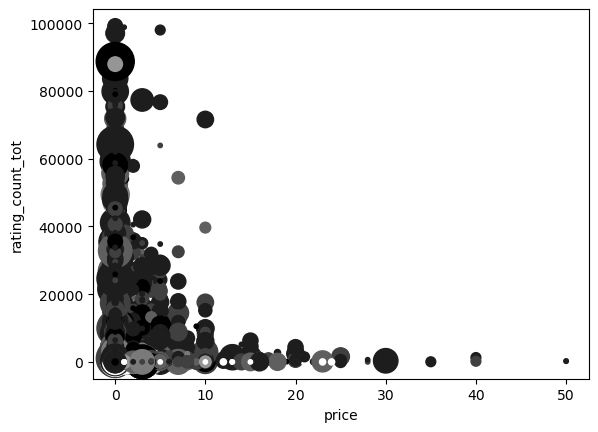

In [23]:
apps_clean.plot.scatter(x='price', y='rating_count_tot', c=apps_clean['user_rating'], s=apps_clean['lang.num'] * 10)

## Challenge Question 5

Based on what you just learned, create a bar plot which achieves the following:
- Visualizes the 5 most expensive education apps
- Price should be provided on the Y axis
- The application names should be provided on the X axis
- The graph should have the color `DarkOrange`
- The legend should be removed from the graph

<AxesSubplot:xlabel='track_name'>

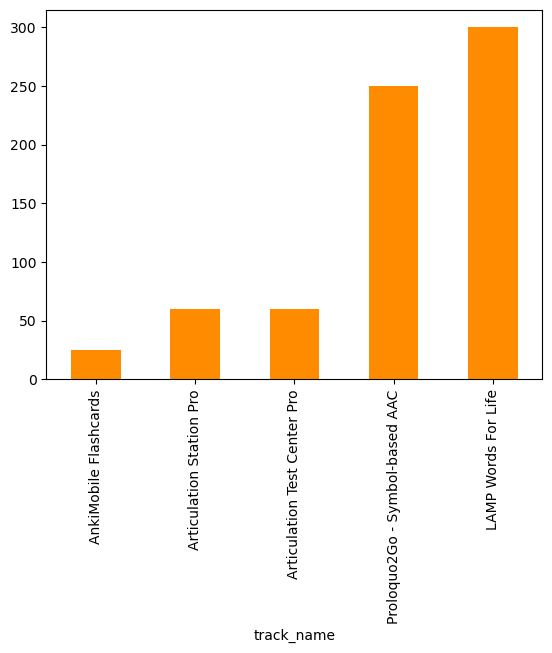

In [24]:
education_clean = apps[(apps['prime_genre'] == 'Education') &
                  (apps['price'] > 20)]

education_set = education_clean.sort_values(by='price')

education_set.plot.bar(x='track_name', y='price', color='DarkOrange', legend= None)

## References

Li, Q., Guan, X., Wu, P., Wang, X., Zhou, L., Tong, Y., ... & Xing, X. (2020). Early transmission dynamics in Wuhan, China, of novel coronavirus–infected pneumonia. New England Journal of Medicine.

The Pandas Development Team (2020). Visualization. Retrieved from: https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html